In [2]:
import glob
#import datetime

import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import fft, ifft, fft2, ifft2, fftshift

from jdutil import *
from gpclock import read_header, get_time_delay, get_TB_sec, read_prf

In [2]:
earth_list = sorted(glob.glob('./final_test/*earth.csv'))

In [3]:
prf_earth = np.genfromtxt(earth_list[0], skip_header=14).T

In [4]:
original = prf_earth[1]
shift = np.roll(prf_earth[1], -1150)

In [ ]:
##### type(original)

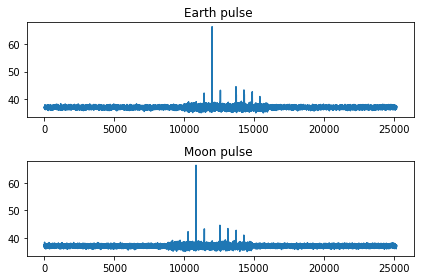

In [6]:
plt.close()
plt.subplot(2, 1, 1)
plt.plot(original)
plt.title("Earth pulse ")

# !!! Две строки, три столбца.
# !!! Текущая ячейка - 2
plt.subplot(2, 1, 2)
plt.plot(shift)
plt.title("Moon pulse ")

plt.tight_layout()

plt.show()

In [8]:
earth_list = sorted(glob.glob('./final_test/*earth.csv'))
moon_list = sorted(glob.glob('./final_test/*moon.csv'))

In [9]:
def save_tim(file, time_array):
    with open(file, 'w') as f:
        for idx, value in enumerate(time_array):
            fs_p, sc_p = str(value.to_mjd()).split('.')
            sec = str(round(float( '0.' + sc_p)*24*60*60), 10**8)
            f.write(fs_p + '\t')
            f.write(sec + '\t')
            f.write('0.0' + '\t')
            f.write(sec + '\t')
            f.write('0.0' + '\n')
        
    return None

In [10]:
time_list_earth = []
for i, _ in enumerate(earth_list):
    header = read_header(earth_list[i])
    # print(header)
    prf_earth = np.genfromtxt(earth_list[i], skip_header=14).T

    day, month, year = header['date'].split('/')
    hour, minute, second = header['time'].split(':')
    second, microsecond = second.split('.')
    time_start_earth = datetime(
        int(year),
        int(month),
        int(day),
        int(hour),
        int(minute),
        int(second),
        int(microsecond))
    time_list_earth.append(time_start_earth)

In [11]:
time_list_moon = []
for i, _ in enumerate(moon_list):
    header = read_header(moon_list[i])
    # print(header)
    prf_earth = np.genfromtxt(moon_list[i], skip_header=14).T

    day, month, year = header['date'].split('/')
    hour, minute, second = header['time'].split(':')
    second, microsecond = second.split('.')
    time_start_moon = datetime(
        int(year),
        int(month),
        int(day),
        int(hour),
        int(minute),
        int(second),
        int(microsecond))
    time_list_moon.append(time_start_moon)

In [12]:
save_tim('./earth.out', time_list_earth)

In [13]:
save_tim('./moon.out', time_list_moon)

In [14]:
get_TB_sec('./earth.out', 57754) - get_TB_sec('./moon.out', 57754)

-0.16588108799987822

In [26]:
for i, _ in enumerate(earth_list):
    header = read_header(earth_list[i])
    # print(header)
    prf_earth = np.genfromtxt(earth_list[i], skip_header=14).T

    day, month, year = header['date'].split('/')
    hour, minute, second = header['time'].split(':')
    second, microsecond = second.split('.')
    time_start_earth = datetime(
        int(year),
        int(month),
        int(day),
        int(hour),
        int(minute),
        int(second),
        int(microsecond))
    fs_p_earth, _ = str(time_start_earth.to_mjd()).split('.')
    
    header = read_header(moon_list[i])
    prf_moon = np.genfromtxt(moon_list[i], skip_header=14).T
    # print(header)

    day, month, year = header['date'].split('/')
    hour, minute, second = header['time'].split(':')
    second, microsecond = second.split('.')
    time_start_moon = datetime(
        int(year),
        int(month),
        int(day),
        int(hour),
        int(minute),
        int(second),
        int(microsecond))
    fs_p_moon, _ = str(time_start_moon.to_mjd()).split('.')
    
    tay = 1.2288/1000.
    ts_e = get_TB_sec('./earth_0.out', fs_p_earth)
    ts_m = get_TB_sec('./moon_0.out', fs_p_moon)
    
    print(get_time_delay(0, 0, prf_earth[1], prf_moon[1], 1))
    print('-'*10)
    print(get_time_delay(ts_e, ts_m, prf_earth[1], prf_moon[1], tay))

809
----------
1.1599872
1613
----------
3.1813632
1180
----------
2.617344
187
----------
0.251904
-798
----------
-0.4018176
513
----------
1.3283328
2415
----------
3.1494144
1533
----------
2.6689536


In [16]:
def get_time_delay_full(file_obs_1, file_obs_2, file_out_1, file_out_2):
    
    header_1, points_1, flux_1 = read_prf(file_obs_1)
    header_2, points_2, flux_2 = read_prf(file_obs_2)
    
    day_1, month_1, year_1 = header_1['date'].split('/')
    hour_1, minute_1, second_1 = header_1['time'].split(':')
    second_1, microsecond_1 = second_1.split('.')
    time_start_1 = datetime(
        int(year_1),
        int(month_1),
        int(day_1),
        int(hour_1),
        int(minute_1),
        int(second_1),
        int(microsecond_1))
    time_start_1 -= dt.timedelta(hours=3) # to UTC time
    fs_p_1, _ = str(time_start_1.to_mjd()).split('.')
    
    day_2, month_2, year_2 = header_2['date'].split('/')
    hour_2, minute_2, second_2 = header_2['time'].split(':')
    second_2, microsecond_2 = second_2.split('.')
    time_start_2 = datetime(
        int(year_2),
        int(month_2),
        int(day_2),
        int(hour_2),
        int(minute_2),
        int(second_2),
        int(microsecond_2))
    time_start_2 -= dt.timedelta(hours=3) # to UTC time
    fs_p_2, _ = str(time_start_2.to_mjd()).split('.')
    
    tay = np.float64(header_1['tau'])/1000.
    
    ts_1 = get_TB_sec(file_out_1, fs_p_1)
    ts_2 = get_TB_sec(file_out_2, fs_p_2)
    
    return get_time_delay(ts_1, ts_2, flux_1, flux_2, tay)

In [17]:
i = 1
a = get_time_delay_full(earth_list[i], moon_list[1], './earth.out', './moon.out')

In [18]:
type(a)

numpy.float64

In [19]:
 head, t, ins = read_prf('data4test/AP/010117_1133+16_00.prf')

In [20]:
print(head)

{'obscode': 'PO', 'time': '5:19:20.92138', 'frequency': '112.084', 'period': '1.18780828035', 'tau': '1.2288', 'rtype': 'DPP1', 'N used channels': '450', 'psrname': '1133+16', 'telcode': 'bsa1', 'utctime': '2:19:20.921382', 'date': '1/1/2017'}


In [21]:
print(len(t))

570


In [22]:
print(len(ins))

570


In [23]:
array_1 = [0, 0, 0, 1, 0, 0, 0]
array_2 = [1, 0, 0, 0, 0, 0, 0]

In [24]:
get_time_delay(0, 0.5, array_1, array_2, 1)

-2.5

In [28]:
np.round(654689.6546876916854, 8)

654689.65468769

## Создание и тестирование структуры

In [3]:
import ctypes

In [4]:
class timout(ctypes.Structure):
     _fields_ = [
         ('ntoas', ctypes.c_int),
         ('psrname', ctypes.c_char_p),
         ('mjd', ctypes.c_double * 1000),
         ('utc', ctypes.c_double * 1000),
         ('tdt', ctypes.c_double * 1000),
         ('err', ctypes.c_double * 1000),
         ('tdb', ctypes.c_double * 1000),
         ('res', ctypes.c_double * 1000),
         ('sigma', ctypes.c_char_p)
     ]

In [5]:
timout.ntoas = '1133+16'

In [6]:
timout.ntoas

'1133+16'

In [11]:
data = (1.1, 1.2, 1.3, 1.4)
L = len(data)
timout.tdb = (ctypes.c_double * L)(*data)

In [14]:
timout.tdb[5]

IndexError: invalid index